## Hate Meme Recognition Naive Bayes Model
The Naive Bayes Model will be using the memes object recoginition from Google API. The original dataset was Facebook dataset. All processed memes data were saved in .json files. All files will be included for model training. After training the Naive Bayes model, the self-labeled dataset will be used of testing.

### Data Preprocessing

In [1]:
import pandas as pd
# read all csv files for facebook data set
df_1=pd.read_csv("https://raw.githubusercontent.com/codepharmer/AIM-5011-NLP-Final-Project/main/data/processed/google_API_response/facebook_images_API_response_1.csv")
df_2=pd.read_csv("https://raw.githubusercontent.com/codepharmer/AIM-5011-NLP-Final-Project/main/data/processed/google_API_response/facebook_images_API_response_2.csv")
df_3=pd.read_csv("https://raw.githubusercontent.com/codepharmer/AIM-5011-NLP-Final-Project/main/data/processed/google_API_response/facebook_images_API_response_3.csv")
df_4=pd.read_csv("https://raw.githubusercontent.com/codepharmer/AIM-5011-NLP-Final-Project/main/data/processed/google_API_response/facebook_images_API_response_4.csv")
df_5=pd.read_csv("https://raw.githubusercontent.com/codepharmer/AIM-5011-NLP-Final-Project/main/data/processed/google_API_response/facebook_images_API_response_5.csv")
df_6=pd.read_csv("https://raw.githubusercontent.com/codepharmer/AIM-5011-NLP-Final-Project/main/data/processed/google_API_response/facebook_images_API_response_6.csv")
df_7=pd.read_csv("https://raw.githubusercontent.com/codepharmer/AIM-5011-NLP-Final-Project/main/data/processed/google_API_response/facebook_images_API_response_7.csv")
df_8=pd.read_csv("https://raw.githubusercontent.com/codepharmer/AIM-5011-NLP-Final-Project/main/data/processed/google_API_response/facebook_images_API_response_8.csv")
df_9=pd.read_csv("https://raw.githubusercontent.com/codepharmer/AIM-5011-NLP-Final-Project/main/data/processed/google_API_response/facebook_images_API_response_9.csv")
df_10=pd.read_csv("https://raw.githubusercontent.com/codepharmer/AIM-5011-NLP-Final-Project/main/data/processed/google_API_response/facebook_images_API_response_10.csv")

# Combine all CSV files
df=pd.concat([df_1,df_2,df_3,df_4,df_5,df_6,df_7,df_8,df_9,df_10])
# view dataset
print(df.shape)
df.head()

(12140, 4)


,Name,hate,text,object
0,08291.png,1,"text_annotations {\n locale: ""en""\n descript...","localized_object_annotations {\n mid: ""/m/01g..."
1,46971.png,1,"text_annotations {\n locale: ""en""\n descript...","localized_object_annotations {\n mid: ""/m/0jy..."
2,03745.png,1,"text_annotations {\n locale: ""en""\n descript...","localized_object_annotations {\n mid: ""/m/01g..."
3,83745.png,1,"text_annotations {\n locale: ""en""\n descript...","localized_object_annotations {\n mid: ""/j/5qg..."
4,80243.png,1,"text_annotations {\n locale: ""en""\n descript...","localized_object_annotations {\n mid: ""/m/01g..."


In [2]:
# reste index
df=df.reset_index(drop=True)
# Modify the data type of object columns to string
df.object=df.object.astype('string')
# sanity check
df.head()

,Name,hate,text,object
0,08291.png,1,"text_annotations {\n locale: ""en""\n descript...","localized_object_annotations { mid: ""/m/01g3..."
1,46971.png,1,"text_annotations {\n locale: ""en""\n descript...","localized_object_annotations { mid: ""/m/0jyf..."
2,03745.png,1,"text_annotations {\n locale: ""en""\n descript...","localized_object_annotations { mid: ""/m/01g3..."
3,83745.png,1,"text_annotations {\n locale: ""en""\n descript...","localized_object_annotations { mid: ""/j/5qg9..."
4,80243.png,1,"text_annotations {\n locale: ""en""\n descript...","localized_object_annotations { mid: ""/m/01g3..."


In [3]:
# check object
df.object[0]

'localized_object_annotations {\n  mid: "/m/01g317"\n  name: "Person"\n  score: 0.8943897485733032\n  bounding_poly {\n    normalized_vertices {\n      x: 0.27208825945854187\n      y: 0.1178608313202858\n    }\n    normalized_vertices {\n      x: 0.5913463830947876\n      y: 0.1178608313202858\n    }\n    normalized_vertices {\n      x: 0.5913463830947876\n      y: 0.9664241671562195\n    }\n    normalized_vertices {\n      x: 0.27208825945854187\n      y: 0.9664241671562195\n    }\n  }\n}\nlocalized_object_annotations {\n  mid: "/m/01g317"\n  name: "Person"\n  score: 0.8912197351455688\n  bounding_poly {\n    normalized_vertices {\n      x: 0.6222532391548157\n      y: 0.00870607141405344\n    }\n    normalized_vertices {\n      x: 0.9596083760261536\n      y: 0.00870607141405344\n    }\n    normalized_vertices {\n      x: 0.9596083760261536\n      y: 0.3593524992465973\n    }\n    normalized_vertices {\n      x: 0.6222532391548157\n      y: 0.3593524992465973\n    }\n  }\n}\nlocaliz

By checking the 'object' column example, we found the information needed needs to be extracted from a large text string after the key 'name:'. Therefore, regular experession will be used for the meme object info extraction.

In [4]:
import re
import numpy as np
def extractor(s):
    '''This function is used to extractor objects name form object columns'''
    if pd.isnull(s):
        return []
    pattern=re.compile('name: "(.+)"')
    result=pattern.findall(s)
    return result

In [5]:
# check example
extractor(df.object[0])

['Person',
 'Person',
 'Person',
 'Person',
 'Luggage & bags',
 'Shoe',
 'Shoe',
 'Person',
 'Food',
 'Footwear']

After extraction the useful information, the original object raw text will be replaced by the new lists.

In [6]:
obj_list=[]
# process items in column 'object' one by one 
for i in range(len(df)):
    # extractor name
    obj_list.append(extractor(df.object[i]))
    extractor(df.object[i])
df['object_name']=obj_list
# drop column 'object'
df=df.drop(['object'],axis=1)
# check
df.head()

,Name,hate,text,object_name
0,08291.png,1,"text_annotations {\n locale: ""en""\n descript...","[Person, Person, Person, Person, Luggage & bag..."
1,46971.png,1,"text_annotations {\n locale: ""en""\n descript...","[Glasses, Person, Person, Person, Necklace, Pe..."
2,03745.png,1,"text_annotations {\n locale: ""en""\n descript...","[Person, Top, Luggage & bags]"
3,83745.png,1,"text_annotations {\n locale: ""en""\n descript...",[Packaged goods]
4,80243.png,1,"text_annotations {\n locale: ""en""\n descript...","[Person, Person, Person, Person, Person, Cloth..."


### Naive Bayes Model
We will use nltk to create the Naive Bayes model. First of all, the words in the object_name column needs to be labeled as hate or not hate.

In [7]:
def feature_map(words):
    '''this function is used to map word list to dictionary for Naive Bayes classfier'''
    words_dictionary = dict([word, True] for word in words)
    return words_dictionary

# load the naive bayes classifier + the classify library
from nltk import classify
from nltk import NaiveBayesClassifier

# get train feature set
train_set = []
for i in range(len(df)):
    if(df.hate[i]==1):
        train_set.append((feature_map(df.object_name[i]), 'hate'))
    else:
        train_set.append((feature_map(df.object_name[i]), 'not hate'))

The the classifier was set and trained with the labeled object names.

In [8]:
# train naive bayes clssfier on train_set        
classifier = NaiveBayesClassifier.train(train_set)

# display the 30 most informative features as determined by the Naive Bayes classifier
print (classifier.show_most_informative_features(30))

Most Informative Features
                  Insect = True           not ha : hate   =      7.7 : 1.0
              Dishwasher = True           not ha : hate   =      6.9 : 1.0
             Baked goods = True           not ha : hate   =      4.1 : 1.0
                Squirrel = True           not ha : hate   =      4.1 : 1.0
              Brown bear = True           not ha : hate   =      3.7 : 1.0
                     Box = True             hate : not ha =      3.6 : 1.0
               Miniskirt = True           not ha : hate   =      3.3 : 1.0
              Basketball = True             hate : not ha =      3.0 : 1.0
                   Sheep = True           not ha : hate   =      3.0 : 1.0
                    Cart = True             hate : not ha =      2.8 : 1.0
                 Goggles = True             hate : not ha =      2.8 : 1.0
                 Hot dog = True             hate : not ha =      2.8 : 1.0
                 Penguin = True             hate : not ha =      2.8 : 1.0

Generally, we can find, hate memes are more likely to show objects such as boxes, basketball, penguin, carts and so on. Now we can evaluate the model with ROC curve and confusion matrix.

In [9]:
from sklearn.metrics import roc_curve,auc
import numpy as np
import matplotlib.pyplot as plt 

def plot_roc(x,y):
    '''this function is use to plot roc curve and find auc'''
    fpr, tpr, _ =roc_curve(x,y)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (auc = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_cm(x,y):
    '''this function is used to plot confusion matrix'''
    cm_bow = confusion_matrix(x,y)
    ax=sns.heatmap(cm_bow,fmt='g',annot=True,cmap='Blues') 
    ax.set_title('confusion matrix') 
    ax.set_xlabel('predict') 
    ax.set_ylabel('true') 
    plt.show()

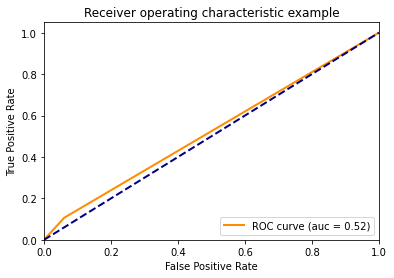

In [11]:
y_pred=[]
# Use the trained naive Bayes classifier to classify the test review set one by one
# put the prediction result into y_pred
for t in df.object_name:
    # use our feature map function to map features 
    features = feature_map(t)
    # apply the classifier to the maped features 
    if(classifier.classify(features)=='hate'):
        y_pred.append(1)
    else:
        y_pred.append(0)

# plot roc
plot_roc(df.hate, y_pred)

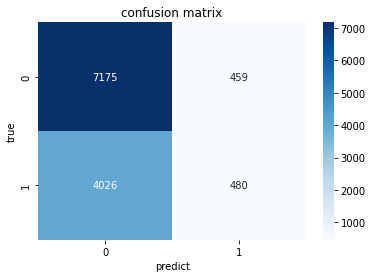

In [12]:
plot_cm(df.hate, y_pred)

In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(df.hate, y_pred)

0.6305601317957167

### Testing the Model
Now we can create a new dataframe based on our self-labeled dataset. 

In [14]:
new_df=pd.read_csv(r'https://raw.githubusercontent.com/huchuyun/AIM-5011-NLP-Final-Project/main/data/processed/validation_set_object_set.csv')
new_df.head()

,image_name,object,label
0,003a75cf599e9b24b6951f731eaee7d2.jpeg,"['Person', 'Clothing']",0
1,027-funny-animal-pictures-with-captions-013-pa...,"['Panda', 'Panda', 'Panda', 'Animal']",0
2,098f8e5f97e5668547e70ad803e27923--macros-shake...,"['Person', 'Hat', 'Clothing']",1
3,0caa2605cd53a61310a948e08a9aedbc.png,"['Person', 'Clothing']",1
4,0rockysuperman.jpg,['Dog'],0


The prediction results will be put in a new list. 

In [15]:
y_pred_new=[]
# Use the trained naive Bayes classifier to classify the test review set one by one
# put the prediction result into y_pred
for h in new_df.object:
    # use our feature map function to map features 
    features = feature_map(h)
    # apply the classifier to the maped features 
    if(classifier.classify(features)=='hate'):
        y_pred_new.append(1)
    else:
        y_pred_new.append(0)

The ROC curve, confusion metrix and accuracy score will be created as below.

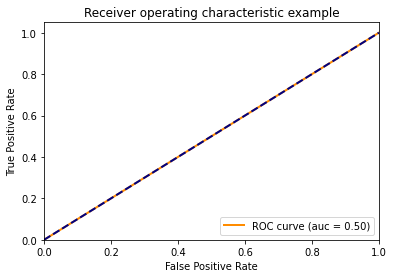

In [16]:
# plot roc
plot_roc(new_df.label, y_pred_new)

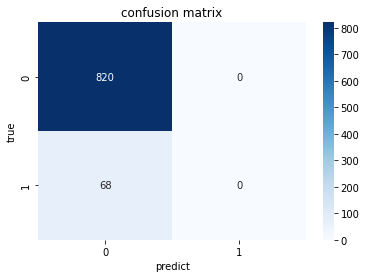

In [17]:
plot_cm(new_df.label, y_pred_new)

In [18]:
accuracy_score(new_df.label, y_pred_new)

0.9234234234234234

The accuracy is high due to the imbalance of our data. According to the result, it shows all predictions are no hate. 

### Result Saving

In [19]:
df_prediction = new_df[['image_name', 'label']]

In [20]:
df_prediction['prediction'] = pd.DataFrame(y_pred_new)

In [21]:
# local save prediction result 
#df_prediction.to_csv(r'C:\Users\chenkecoco1\Documents\GitHub\AIM-NN\object_recognition_selfmeme.csv')

In [27]:
df_fb = df[['Name', 'hate']]

In [29]:
import warnings
warnings.filterwarnings("ignore")

df_fb['prediction'] = pd.DataFrame(y_pred)

In [31]:
# local save prediction result 
#df_fb.to_csv(r'C:\Users\chenkecoco1\Documents\GitHub\AIM-NN\object_recognition_fbmeme.csv')